In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [ ]:
import torchvision
import torchvision.transforms as transforms

train_dataset = torchvision.datasets.MNIST(root="MNIST_data/",
                                train=True,
                                transform = transforms.ToTensor(),
                                download=True)

test_dataset = torchvision.datasets.MNIST(root="MNIST_data/",
                                train = False,
                                transform = transforms.ToTensor(),
                                download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
batch_size = 128

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.linear = nn.Linear(784, 256)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.linear = nn.Linear(256, 784)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return z, x_hat



### nn.Sequential을 사용해 한 모델에서 AutoEncoder 작성하기

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(784, 256),
                                     nn.Sigmoid(),
                                     )
        self.decoder = nn.Sequential(nn.Linear(256, 784),
                                     nn.Sigmoid(),
                                     )
        
    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return z, x_hat

In [ ]:
model = AutoEncoder().to(device)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
criterion = nn.MSELoss()

In [ ]:
sample = test_dataset[1051][0].view(-1,784).to(device)

Epoch: 1 / 30, cost : 0.0794864147901535


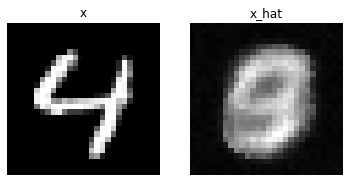

Epoch: 2 / 30, cost : 0.0566466823220253
Epoch: 3 / 30, cost : 0.04613562673330307
Epoch: 4 / 30, cost : 0.03923364728689194
Epoch: 5 / 30, cost : 0.03438744321465492
Epoch: 6 / 30, cost : 0.030589183792471886


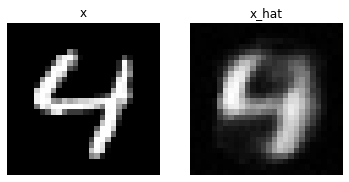

Epoch: 7 / 30, cost : 0.02747292071580887
Epoch: 8 / 30, cost : 0.024846648797392845
Epoch: 9 / 30, cost : 0.022603319957852364
Epoch: 10 / 30, cost : 0.020670484751462936
Epoch: 11 / 30, cost : 0.018994512036442757


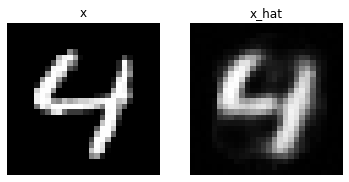

Epoch: 12 / 30, cost : 0.017534935846924782
Epoch: 13 / 30, cost : 0.016257623210549355
Epoch: 14 / 30, cost : 0.015132335014641285
Epoch: 15 / 30, cost : 0.01413268968462944
Epoch: 16 / 30, cost : 0.013237610459327698


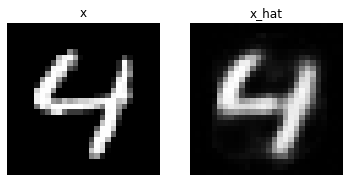

Epoch: 17 / 30, cost : 0.012432843446731567
Epoch: 18 / 30, cost : 0.011706976220011711
Epoch: 19 / 30, cost : 0.011050086468458176
Epoch: 20 / 30, cost : 0.010453572496771812
Epoch: 21 / 30, cost : 0.009910119697451591


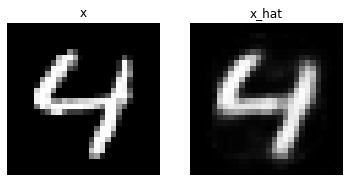

Epoch: 22 / 30, cost : 0.009413459338247776
Epoch: 23 / 30, cost : 0.008958309888839722
Epoch: 24 / 30, cost : 0.008540159091353416
Epoch: 25 / 30, cost : 0.008155141957104206
Epoch: 26 / 30, cost : 0.007799853105098009


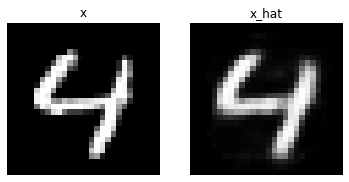

Epoch: 27 / 30, cost : 0.007471156306564808
Epoch: 28 / 30, cost : 0.007166244089603424
Epoch: 29 / 30, cost : 0.006882696878165007
Epoch: 30 / 30, cost : 0.006618336774408817


In [ ]:
epochs = 31

model.train()
for epoch in range(epochs):
    model.train()
    avg_cost = 0
    total_batch_num = len(train_dataloader)

    for b_x, b_y in train_dataloader:
        b_x = b_x.view(-1, 784).to(device)
        z, b_x_hat = model.forward(b_x)
        loss = criterion(b_x_hat, b_x)

        avg_cost += loss / total_batch_num
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch: {epoch + 1} / {epochs}, cost : {avg_cost}')

    # observe differences
    if epoch % 5 == 0:
        model.eval()
        fig, ax = plt.subplots(1, 2)
        with torch.no_grad():
            test_z, test_output = model.forward(sample)

        ax[0].set_title('x')
        ax[1].set_title('x_hat')

        ax[0].set_axis_off()
        ax[1].set_axis_off()
        ax[0].imshow(np.reshape(sample.detach().cpu(), (28, 28)), cmap='gray')
        ax[1].imshow(np.reshape(test_output.detach().cpu(), (28, 28)), cmap='gray')
        plt.show()
        

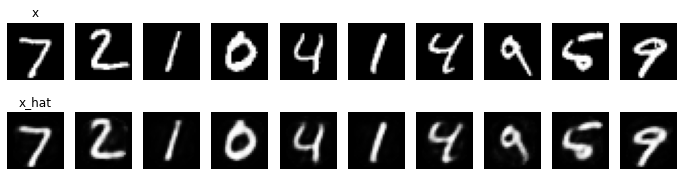

In [ ]:
model.eval()
test_samples = torch.zeros((10, 28, 28))
for i in range(10):
    test_samples[i] = test_dataset[i][0]

test_samples = test_samples.view(-1, 784).to(device)
z, test_output = model.forward(test_samples)

fig, ax = plt.subplots(2, 10, figsize=(12,3))
ax[0][0].set_title('x')
ax[1][0].set_title('x_hat')

for i in range(10):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(test_samples[i].detach().cpu(), (28, 28)), cmap='gray')
    ax[1][i].imshow(np.reshape(test_output[i].detach().cpu(), (28, 28)), cmap='gray')
plt.show()


### Encoder, Decoder class 각각 나눠서 하나씩 부르기

### Parameter List 사용하기

In [ ]:
encoder = Encoder().to(device)
decoder = Decoder().to(device)

In [ ]:
params = list(encoder.parameters()) + list(decoder.parameters())
optimizer = optim.Adam(params, lr=0.001)

In [ ]:
epochs = 31

encoder.train()
decoder.train()

for epoch in range(epochs):
    encoder.train()
    decoder.train()
    
    avg_cost = 0
    total_batch_num = len(train_dataloader)

    for b_x, b_y in train_dataloader:
        b_x = b_x.view(-1, 784).to(device)
        z = encoder(b_x)
        b_x_hat = decoder(z)
        loss = criterion(b_x_hat, b_x)

        avg_cost += loss / total_batch_num
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch: {epoch + 1} / {epochs}, cost : {avg_cost}')

    # observe differences
    if epoch % 5 == 0:
        encoder.eval()
        decoder.eval()
        fig, ax = plt.subplots(1, 2)
        with torch.no_grad():
            test_z = encoder.forward(sample)
            test_output = decoder(test_z)

        ax[0].set_title('x')
        ax[1].set_title('x_hat')

        ax[0].set_axis_off()
        ax[1].set_axis_off()
        ax[0].imshow(np.reshape(sample.detach().cpu(), (28, 28)), cmap='gray')
        ax[1].imshow(np.reshape(test_output.detach().cpu(), (28, 28)), cmap='gray')
        plt.show()
        

### 두개의 optimizer 사용하기

In [ ]:
encoder = Encoder().to(device)
decoder = Decoder().to(device)

In [ ]:
optimizer = optim.Adam([
    {"params": encoder.parameters(), "lr": 0.001},
    {"params": decoder.parameters(), "lr": 0.001},
])